In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = '../DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [3]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [5]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [6]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [7]:
# Duplicated
df.duplicated().sum()

14342

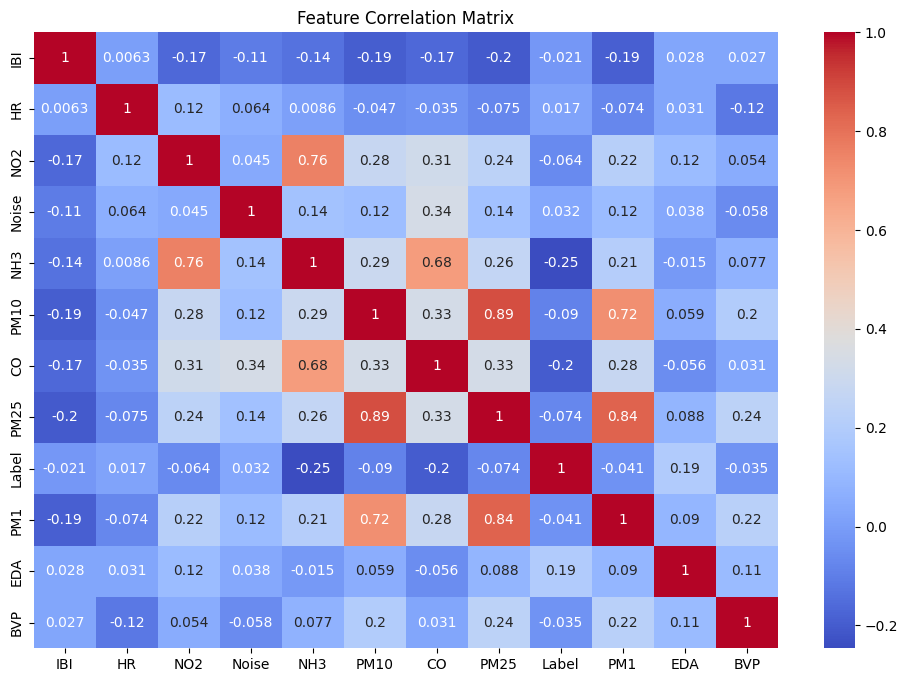

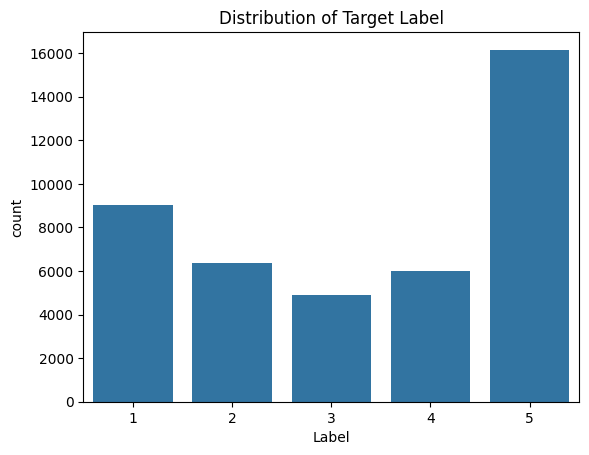

In [8]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [9]:
# Jika ingin menghapus duplikat tanpa menimpa df lama
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28094 entries, 0 to 38158
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     28094 non-null  float64
 1   HR      28094 non-null  float64
 2   NO2     28094 non-null  float64
 3   Noise   28094 non-null  float64
 4   NH3     28094 non-null  float64
 5   PM10    28094 non-null  float64
 6   CO      28094 non-null  float64
 7   PM25    28094 non-null  float64
 8   Label   28094 non-null  int64  
 9   PM1     28094 non-null  float64
 10  EDA     28094 non-null  float64
 11  BVP     28094 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 2.8 MB


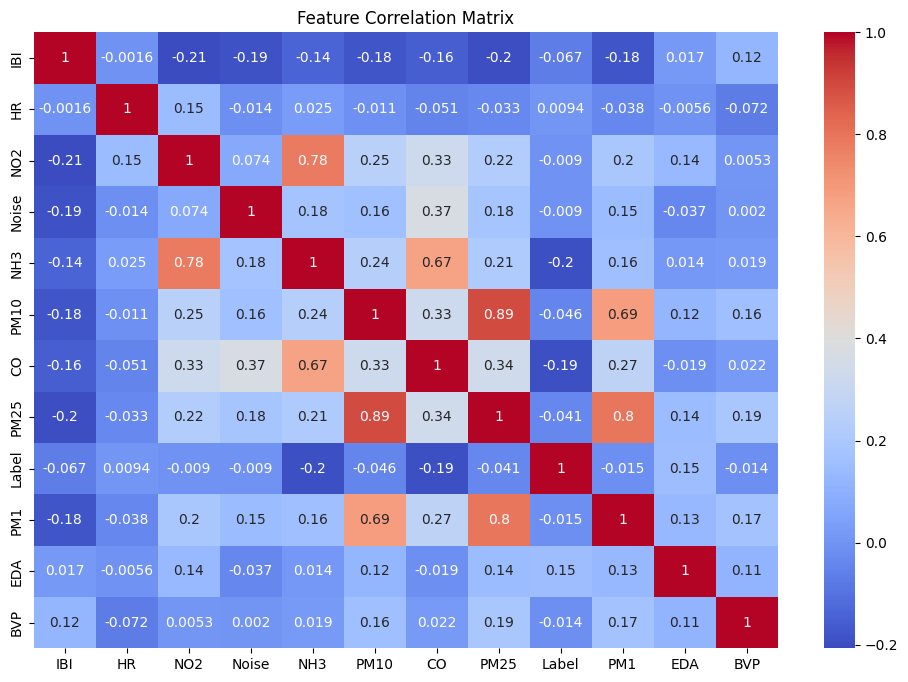

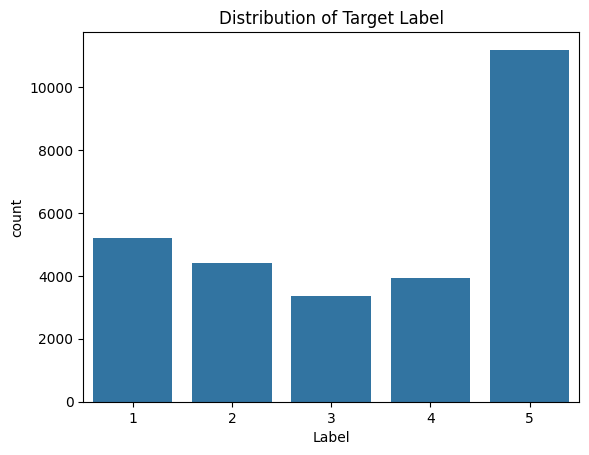

In [10]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_12315/3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


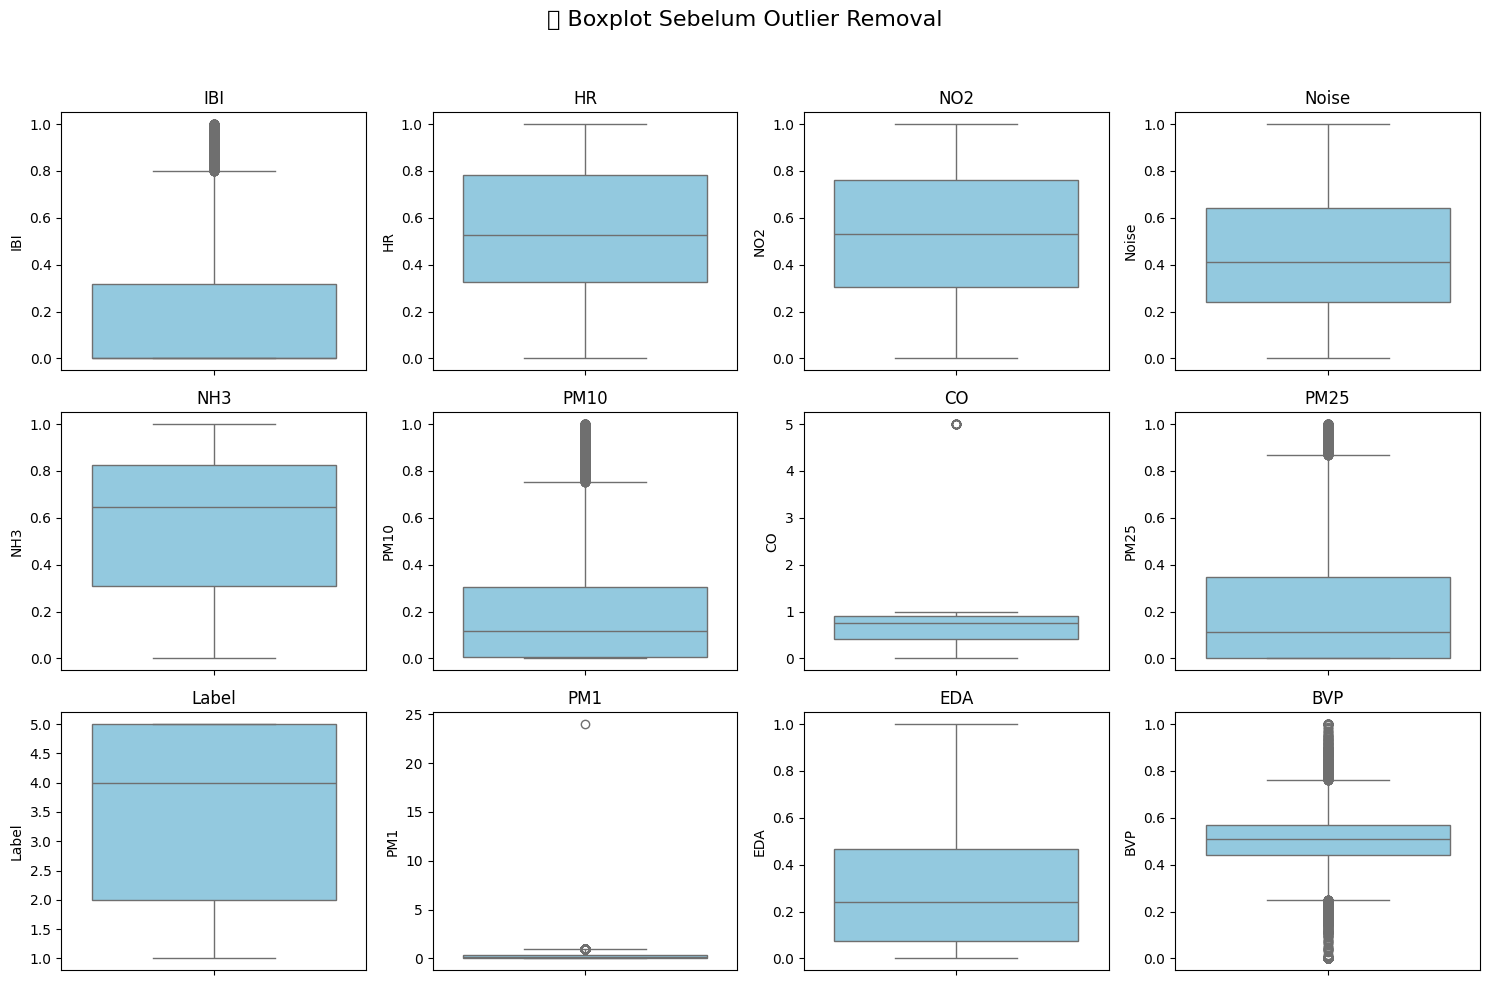

In [11]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


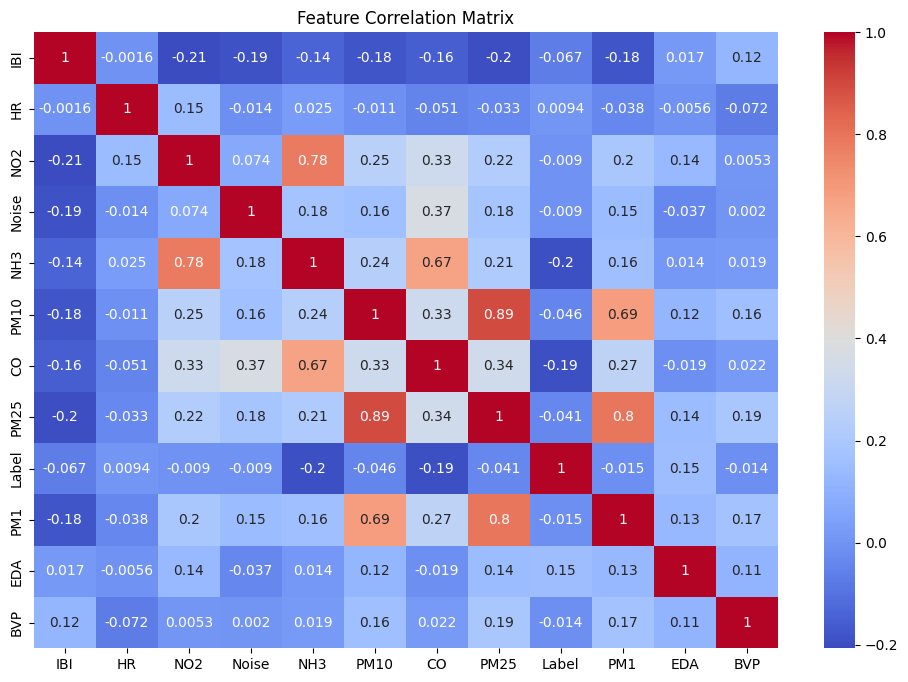

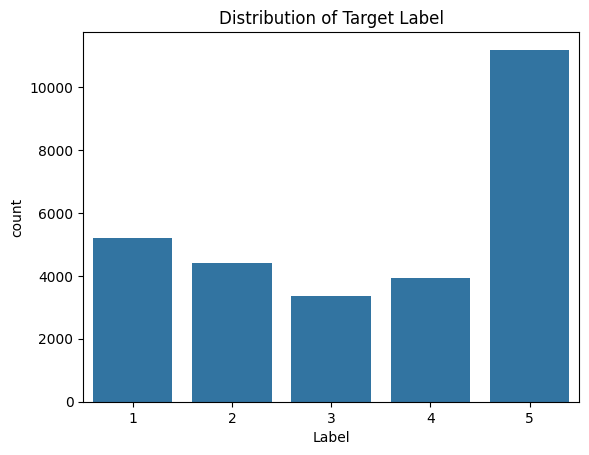

In [12]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [13]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [14]:
import numpy as np
import pandas as pd
from scipy import stats

# Pastikan hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Hitung Z-score absolut
z_scores = np.abs(stats.zscore(numeric_df))

# Buat DataFrame Z-score agar mudah dianalisis
z_scores_df = pd.DataFrame(
    z_scores,
    index=numeric_df.index,
    columns=numeric_df.columns
)

# Hitung jumlah nilai dengan Z-score >= 3 per kolom
outlier_counts = (z_scores_df >= 3).sum()

# Tampilkan hasil
print("Jumlah outlier (|Z-score| >= 3) per fitur:")
print(outlier_counts)

# Opsional: Tampilkan dalam bentuk DataFrame yang rapi
outlier_summary = pd.DataFrame({
    'Fitur': outlier_counts.index,
    'Jumlah_Outlier': outlier_counts.values
})
print("\nRingkasan:")
print(outlier_summary)

Jumlah outlier (|Z-score| >= 3) per fitur:
IBI      130
HR         0
NO2        0
Noise      0
NH3        0
PM10     209
CO         0
PM25      55
Label      0
PM1      137
EDA       12
BVP        0
dtype: int64

Ringkasan:
    Fitur  Jumlah_Outlier
0     IBI             130
1      HR               0
2     NO2               0
3   Noise               0
4     NH3               0
5    PM10             209
6      CO               0
7    PM25              55
8   Label               0
9     PM1             137
10    EDA              12
11    BVP               0


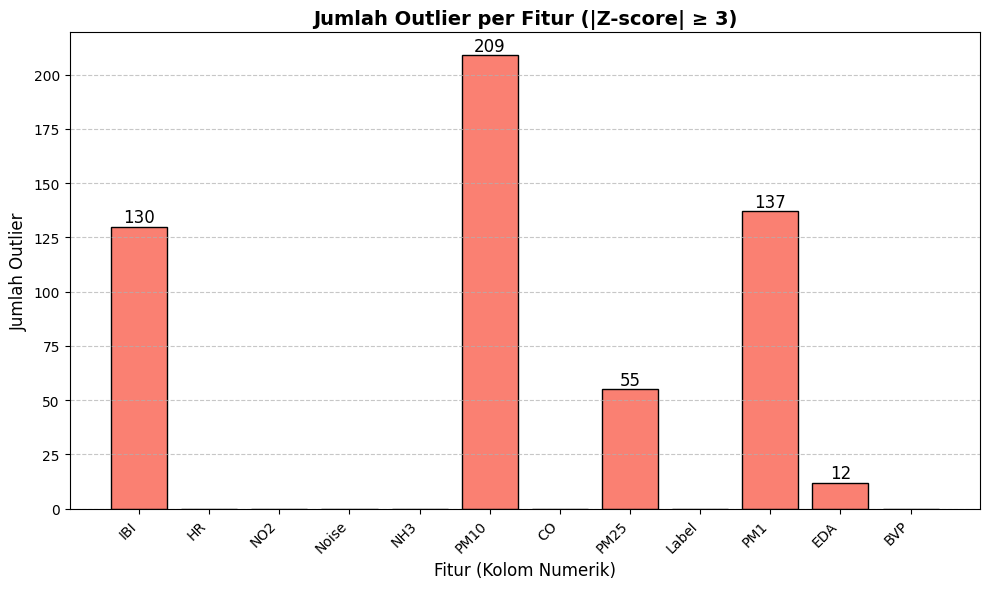


Jumlah outlier per fitur:
IBI      130
HR         0
NO2        0
Noise      0
NH3        0
PM10     209
CO         0
PM25      55
Label      0
PM1      137
EDA       12
BVP        0


In [15]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Hitung Z-score absolut
z_scores = np.abs(stats.zscore(numeric_df))

# Buat DataFrame Z-score
z_scores_df = pd.DataFrame(
    z_scores,
    index=numeric_df.index,
    columns=numeric_df.columns
)

# Hitung jumlah outlier per fitur (|Z| >= 3)
outlier_counts = (z_scores_df >= 3).sum()

# --- Visualisasi ---
plt.figure(figsize=(10, 6))
bars = plt.bar(outlier_counts.index, outlier_counts.values, color='salmon', edgecolor='black')

# Tambahkan angka di atas setiap batang
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                 f'{int(height)}',
                 ha='center', va='bottom', fontsize=12)

plt.title('Jumlah Outlier per Fitur (|Z-score| ≥ 3)', fontsize=14, weight='bold')
plt.xlabel('Fitur (Kolom Numerik)', fontsize=12)
plt.ylabel('Jumlah Outlier', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Opsional: Tampilkan juga dalam bentuk tabel
print("\nJumlah outlier per fitur:")
print(outlier_counts.to_string())

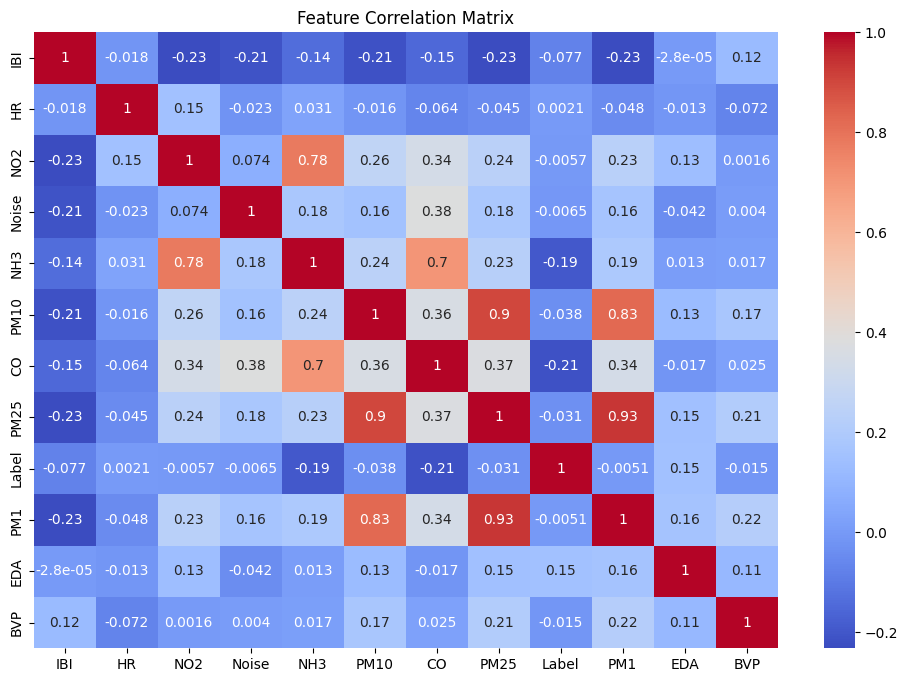

In [16]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [17]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (27216, 11)
Shape of target (y): (27216,)


In [18]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 2. Split train-test (tanpa Random Oversampling dulu)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Distribusi sebelum Random Oversampling:")
print("Train:", Counter(y_train))
print("Test :", Counter(y_test))

# 3. TerapkanRandom Oversampling hanya ke training data
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print("\nDistribusi setelah Random Over (hanya train):")
print("Train Random Over:", Counter(y_train_ros))
print("Test tetap :", Counter(y_test))  # test tidak berubah


Distribusi sebelum Random Oversampling:
Train: Counter({5: 8691, 1: 4026, 2: 3405, 4: 3061, 3: 2589})
Test : Counter({5: 2173, 1: 1007, 2: 851, 4: 766, 3: 647})

Distribusi setelah Random Over (hanya train):
Train Random Over: Counter({5: 8691, 2: 8691, 1: 8691, 3: 8691, 4: 8691})
Test tetap : Counter({5: 2173, 1: 1007, 2: 851, 4: 766, 3: 647})


In [19]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_models(X_train, X_test, y_train, y_test, percobaan="Baseline", output_file="results.csv"):
    # === Daftar model ===
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42)
    }

    rows = []

    for name, model in models.items():
        print(f"\n🔹 Training {name}...")
        
        # === Training ===
        model.fit(X_train, y_train)
        
        # === Prediction ===
        y_pred = model.predict(X_test)
        
        # === Evaluasi ===
        report = classification_report(y_test, y_pred, output_dict=True)
        rows.append({
            "Percobaan": percobaan,
            "Model": name,
            "Accuracy": report["accuracy"],
            "Precision": report["macro avg"]["precision"],
            "Recall": report["macro avg"]["recall"],
            "F1-Score": report["macro avg"]["f1-score"]
        })

        # === Confusion Matrix ===
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.tight_layout()
        plt.show()

    # === Buat dataframe hasil ===
    df_results = pd.DataFrame(rows)
    print("\n📊 Perbandingan Model:")
    print(df_results)

    # === Simpan ke CSV ===
    try:
        existing = pd.read_csv(output_file)
        df_results = pd.concat([existing, df_results], ignore_index=True)
    except FileNotFoundError:
        pass
    df_results.to_csv(output_file, index=False)

    # === Visualisasi perbandingan ===
    df_plot = df_results[df_results["Percobaan"] == percobaan].set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]]
    df_plot.plot(kind="bar", figsize=(10, 6))
    plt.title(f"Perbandingan Model - {percobaan}")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    
    return df_results



🔹 Training Random Forest...


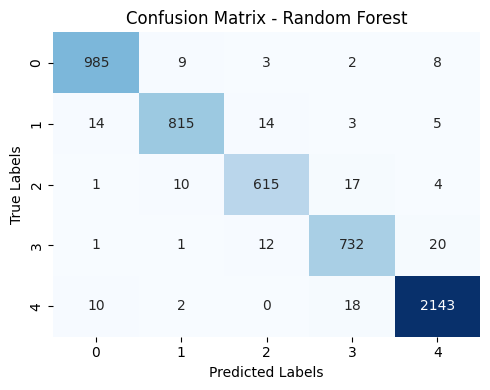


🔹 Training KNN...


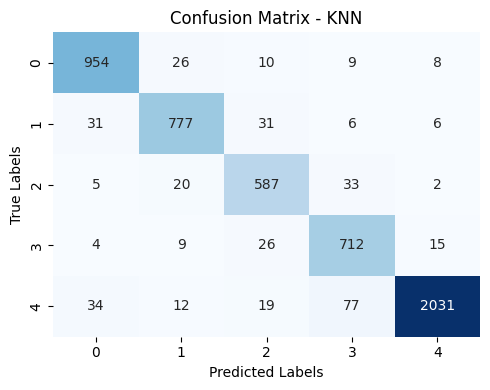


🔹 Training Naive Bayes...


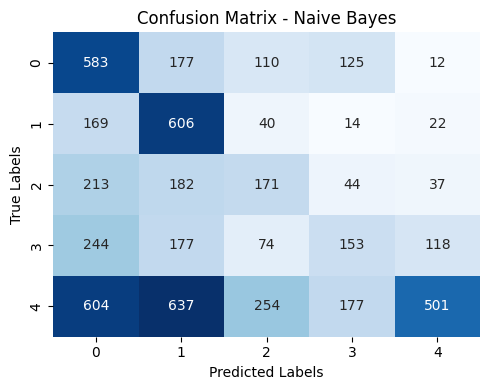


🔹 Training Decision Tree...


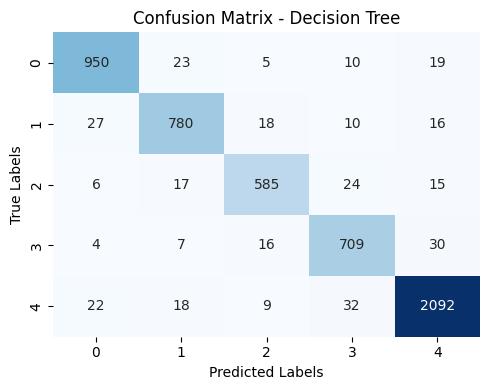


🔹 Training Extra Trees...


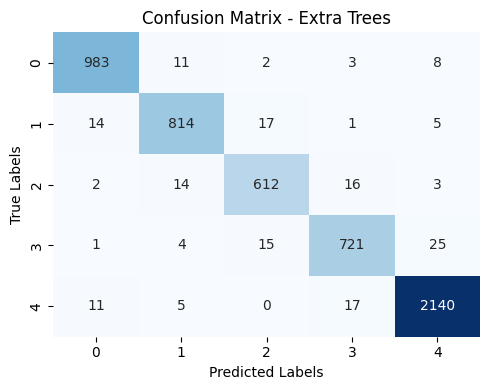


📊 Perbandingan Model:
               Percobaan          Model  Accuracy  Precision    Recall  \
0  Baseline Performa ros  Random Forest  0.971712   0.966836  0.965640   
1  Baseline Performa ros            KNN  0.929647   0.911294  0.926367   
2  Baseline Performa ros    Naive Bayes  0.369949   0.390004  0.397129   
3  Baseline Performa ros  Decision Tree  0.939750   0.931025  0.930490   
4  Baseline Performa ros    Extra Trees  0.968038   0.962393  0.960932   

   F1-Score  
0  0.966220  
1  0.918257  
2  0.345487  
3  0.930706  
4  0.961655  


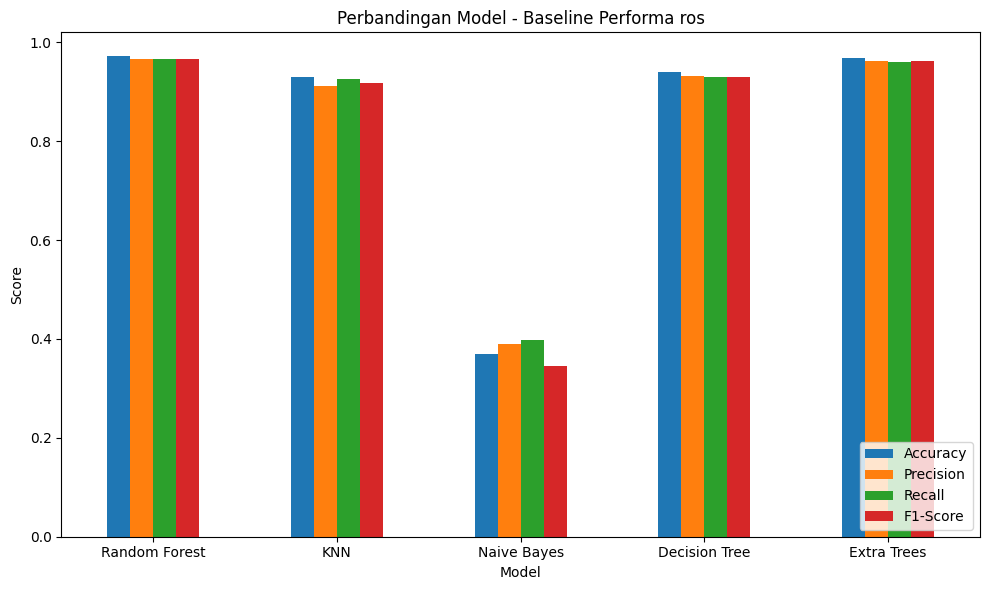

In [20]:
df_results = evaluate_models(
    X_train_ros, X_test, y_train_ros, y_test,
    percobaan="Baseline Performa ros",
    output_file="hasil_model.csv"
)


In [21]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ros)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (43455, 11)
Data Test after normalisation = (5444, 11)



🔹 Training Random Forest...


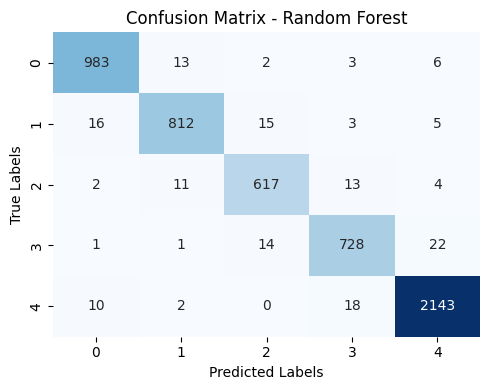


🔹 Training KNN...


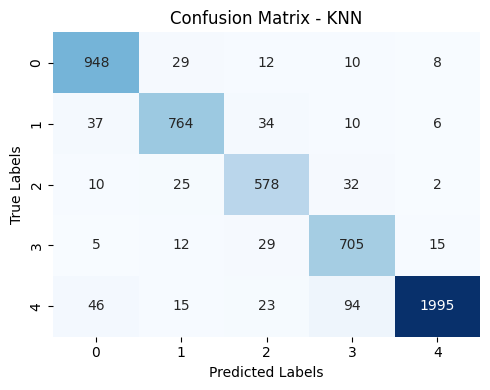


🔹 Training Naive Bayes...


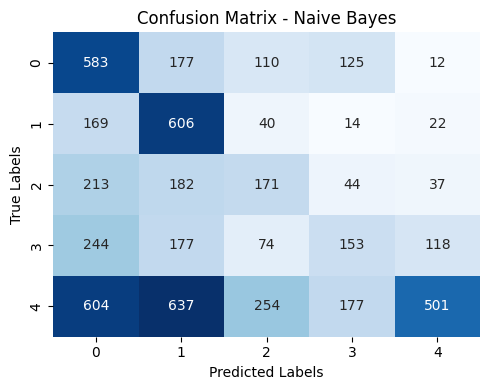


🔹 Training Decision Tree...


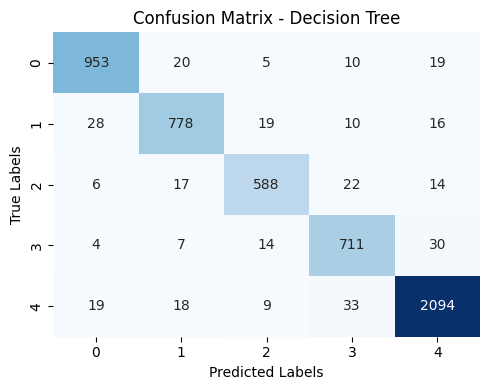


🔹 Training Extra Trees...


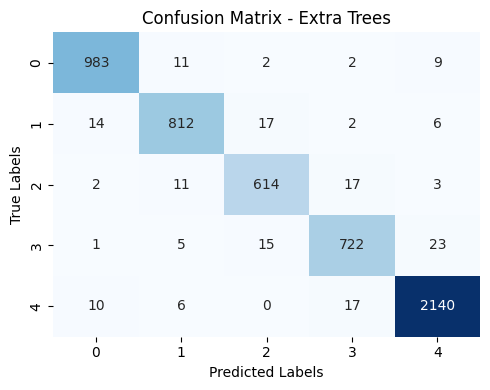


📊 Perbandingan Model:
                    Percobaan          Model  Accuracy  Precision    Recall  \
0  normalization Performa ros  Random Forest  0.970426   0.965197  0.964111   
1  normalization Performa ros            KNN  0.916605   0.895723  0.914197   
2  normalization Performa ros    Naive Bayes  0.369949   0.390004  0.397129   
3  normalization Performa ros  Decision Tree  0.941220   0.932793  0.932249   
4  normalization Performa ros    Extra Trees  0.968222   0.962589  0.961341   

   F1-Score  
0  0.964643  
1  0.904091  
2  0.345487  
3  0.932466  
4  0.961959  


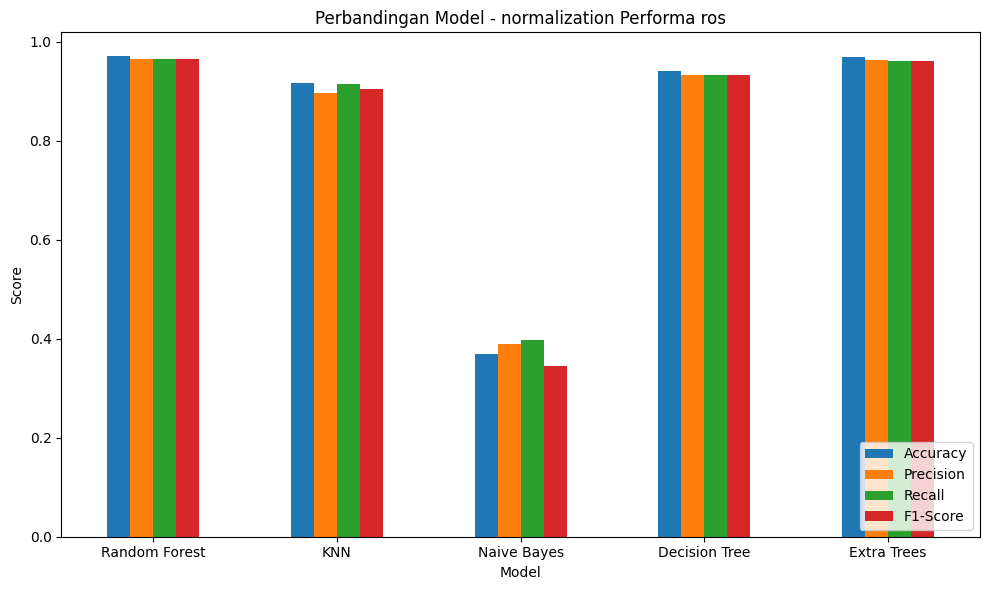

In [22]:
df_results = evaluate_models(
    X_train_scaled, X_test_scaled, y_train_ros, y_test,
    percobaan="normalization Performa ros",
    output_file="hasil_model.csv"
)
